# Linear Regression

### Data Visualization
- Load relevent libraries
- Import data into dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
data = pd.read_csv('./Data/ex1data1.txt', header = None)

- Display the first couple of rows to check if the data was loaded coreectly
- Display summary about the data ex mean, min, max, etc....

In [3]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


**Visualization always help to discover the relationship and to get some intuition about how our model will work**

<Figure size 720x504 with 0 Axes>

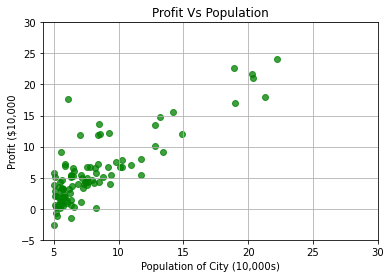

<Figure size 720x504 with 0 Axes>

In [5]:
plt.scatter(data[0], data[1], facecolor = 'g', alpha=0.75)
plt.xticks(np.arange(5,35,step=5))
plt.yticks(np.arange(-5,35,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit Vs Population")
plt.grid(True)
plt.figure(figsize=(10, 7))

## Cost Funcation and Gradient Funcation

Input: X -> features<br>
&emsp; &emsp; &emsp; &ensp;y -> actual values<br>
&emsp; &emsp; &emsp; &ensp;theta -> weights<br>
Output: sum sqaure error

In [6]:
def computeCost(X, y, theta):
    m = len(y)
    predications = X.dot(theta)
    square_err = (predications - y)**2
    return 1/(2*m) * np.sum(square_err)


Fill X with the numpy matrix with first column equal to zero as X0 = 1 and the second column is X1. Fill y with acutal values. Then computing the cost with both thera equal to zero

In [7]:
data_n = data.values
m = len(data_n[:, -1])
X = np.append(np.ones((m, 1)), data_n[:, 0].reshape(m, 1), axis=1)
y = data_n[:, 1].reshape(m, 1)
theta = np.zeros((2, 1))
computeCost(X, y, theta)

32.072733877455676

** BIG MONSTER the implementation of the *Gradient Descent* **<br>
Input: X -> features<br>
&emsp; &emsp; &emsp; &ensp;y -> actual value<br>
&emsp; &emsp; &emsp; &ensp;theta -> intial weights<br>
&emsp; &emsp; &emsp; &ensp;alpha -> learning rate<br>
&emsp; &emsp; &emsp; &ensp;num_iters -> number of iteration<br>

Output: theta -> optimized weights<br>
&emsp; &emsp; &emsp; &ensp; J_history -> cost per iteration (later will be used to plot the cost as to make sure our funcation works fine)

In [8]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []

    for i in range(num_iters):
        predications = X.dot(theta)
        error = np.dot(X.transpose(), (predications - y))
        descent = alpha * (1/m) * error
        theta = theta - descent
        J_history.append(computeCost(X,y,theta))
    
    return theta, J_history

Let's us test what we have done so far 

In [9]:
theta, J_history = gradientDescent(X, y, theta, 0.01, 1500)
print("h(x) = " + str(round(theta[0, 0], 2)) + " + " + str(round(theta[1,0],2)) + "x1")

h(x) = -3.63 + 1.17x1


Now we will plot to make sure our funcation was converging

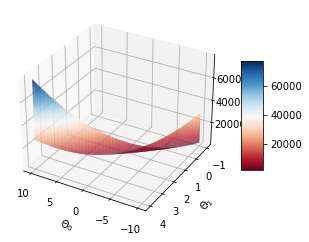

In [10]:
from mpl_toolkits.mplot3d import Axes3D

theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j] = computeCost(X,y,t)

#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # Build three Grids each of size 1*1*!
surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap="RdBu")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
#rotate for better angle
ax.view_init(30, 120)

Plot the history of the theta using "J_history"

Text(0.5, 1.0, 'Cost function using Gradient Descent')

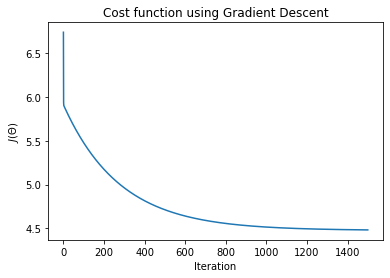

In [11]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Using our Model to Predict 

Text(0.5, 1.0, 'Profit vs Population')

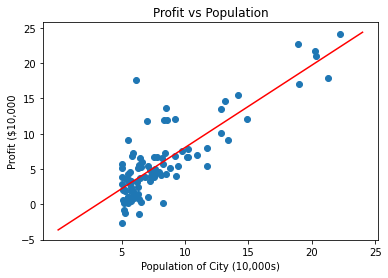

In [12]:
plt.scatter(data[0],data[1])
x_value = [x for x in range(25)]
predicted_value = [y * theta[1]+ theta[0] for y in x_value]
plt.plot(x_value, predicted_value, color="r")
plt.xticks(np.arange(5, 30, step = 5))
plt.yticks(np.arange(-5, 30, step = 5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit vs Population")

Implement a predication funcation<br>
Input: x -> features<br>
&emsp; &emsp; &emsp; &ensp;theta -> weights<br>

Output: predictions -> predicted values

In [13]:
def predict(x,theta):
    predictions= np.dot(theta.transpose(),x)
    return predictions[0]

Now let's try our predication funcation

In [14]:
predict1 = predict(np.array([1,3.5]), theta) * 10000
predict2 = predict(np.array([1,7 ]), theta) * 10000
print("For population = 35,000, we predict a profit of $"+str(round(predict1,0)))
print("For population = 70,000, we predict a profit of $"+str(round(predict2,0)))

For population = 35,000, we predict a profit of $4520.0
For population = 70,000, we predict a profit of $45342.0


So far so good in the next section we will build multivariate linear regression

# Multivariate Linear Regression 

As we already imported the libraries that we will need we will now load the dataset and do some visualization 

In [15]:
data2 = pd.read_csv("./Data/ex1data2.txt", header=None)
data2.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [16]:
data2.describe()

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


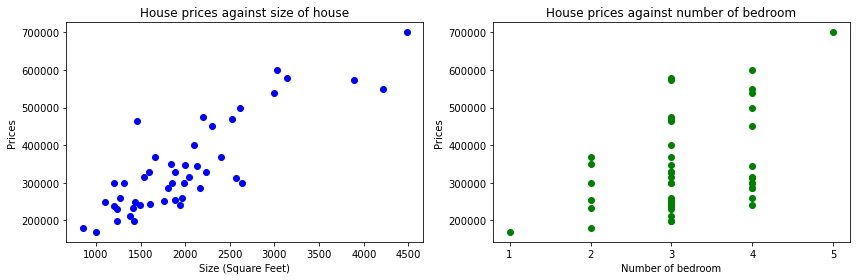

In [17]:
fig, axes = plt.subplots(figsize = (12, 4), nrows = 1, ncols = 2)
axes[0].scatter(data2[0],data2[2], color = "b")
axes[0].set_xlabel("Size (Square Feet)")
axes[0].set_ylabel("Prices")
axes[0].set_title("House prices against size of house")
axes[1].scatter(data2[1], data2[2], color = "g")
axes[1].set_xlabel("Number of bedroom")
axes[1].set_ylabel("Prices")
axes[1].set_xticks(np.arange(1 , 6, step = 1))
axes[1].set_title("House prices against number of bedroom")
# Enhance layout
plt.tight_layout()

Text(0.5, 1.0, 'Size vs Number of bedroom')

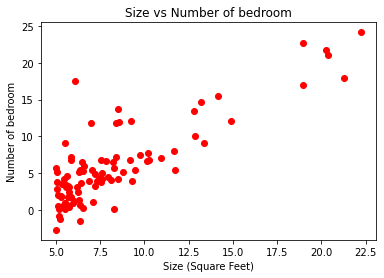

In [18]:
plt.scatter(data[0], data[1], color = 'r')
plt.xlabel("Size (Square Feet)")
plt.ylabel("Number of bedroom")
plt.title("Size vs Number of bedroom")

As we have more the one feature it would be a great idea to speed up or algorithm by normalizing the values of each feature to speed up the calculations<br>
Input: x -> features<br>

Output: X_nrom -> normalized feature<br>
&emsp; &emsp; &emsp; &ensp; mean -> the mean of the feature<br>
&emsp; &emsp; &emsp; &ensp; std -> the standard deviation of the feature



In [19]:
def featureNormalization(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    X_norm = (X - mean) / std
    return X_norm ,mean ,std

Let's test our function

In [20]:
data_n2 = data2.values
m2 = len(data_n2[:, -1])
X2 = data_n2[:, 0:2].reshape(m2,2)
X2, mean_X2, std_X2 = featureNormalization(X2)
X2 = np.append(np.ones((m2, 1)), X2, axis=1)
y2 = data_n2[:,-1].reshape(m2, 1)
theta2 = np.zeros((3, 1))

As we implement cost function and the gradient descent let's test that they work fine with multiple features

In [21]:
theta2, J_history2 = gradientDescent(X2, y2, theta2, 0.01, 400)
print("h(x) = " + str(round(theta2[0, 0], 2)) + " + " + str(round(theta2[1, 0], 2))+"x1 + " + str(round(theta2[2, 0], 2))+"x2")

h(x) = 334302.06 + 99411.45x1 + 3267.01x2


Let's debug our function to make sure the worked well by plotting "J_history2"

Text(0.5, 1.0, 'Cost function using Gradient Descent')

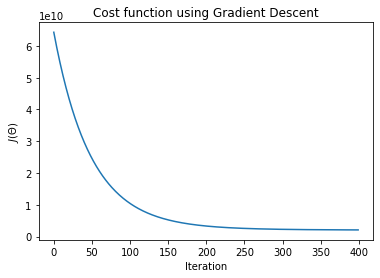

In [22]:
plt.plot(J_history2)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Finally now let's test our predication funccation see if it is working fine with multivariate

In [23]:
x_sample = featureNormalization(np.array([1650,3]))[0]
x_sample = np.append(np.ones(1), x_sample)
predict3 = predict(x_sample, theta2)
print("For size of house = 1650, Number of bedroom = 3, we predict a house value of $" + str(round(predict3, 0)))

For size of house = 1650, Number of bedroom = 3, we predict a house value of $430447.0
